YOUNESS MOUAD (20 132 250)<br>
EL MAHDI ZOUHAIR (20 132 241)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importations utiles
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from entrainement import classifier_donnees
import gestion_donnees as gd
from visualisation_resultats import afficher_graphe_justesse, visualisation_justesse_cas_gaussienne
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#le dictionnaire parametres contient les hyperparametres à tester pour chaque algorithm
parametres = {}
parametres['regression_logistique'] = {'C': [8, 10, 15, 20, 25],
                                       'solver': ['newton-cg', 'lbfgs', 'liblinear']}

parametres['arbre_decision'] = {'criterion': ['gini', 'entropy'],
                                'min_samples_split': [2, 3, 4, 5]}

parametres['foret_arbres_decision'] = {'criterion': ['gini', 'entropy'],
                                       'n_estimators': [100, 150, 200, 250],
                                       'min_samples_split': [2, 3, 4, 5]}

parametres['ada_boost'] = {'learning_rate': [0.01, 0.05, 0.1]}


parametres['machine_vecteur_support'] = {'C': [40, 50, 60, 70],
                                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                         'degree': [2, 3, 4],
                                         'probability': [True]}

parametres['knn'] = {'weights': ['uniform', 'distance'],
                    'n_neighbors': np.arange(2,20)}

parametres['ada_boost_personnalisé'] = {'learning_rate': [0.01, 0.05, 0.1],
                                        'base_estimator__min_samples_split': [2, 3, 4, 5]}


In [ ]:
#classifieurs represente l'enssemble des algorithmes à tester sous la forme d'un dictionnaire 
classifieurs = {
                'regression_logistique': LogisticRegression(max_iter=1000),
                'arbre_decision': DecisionTreeClassifier(),
                'foret_arbres_decision': RandomForestClassifier(),
                'machine_vecteur_support': SVC(),
                'ada_boost': AdaBoostClassifier(),
                'ada_boost_personnalisé' : AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy')),
                'knn': KNeighborsClassifier()
                }

In [18]:
#tous_resultats va contenir à la fin le resultat des meilleurs hyperparametres ainsi que la justesse d'entrainement et de test pour chaque algorithm
tous_resultats = {}
i = 0
for gaussienne, bruit in zip([False, True, True], [False, False, True]):

    #on défini si on veut entrainer sur des donnée gaussienne ou non, avec du bruit ou non
    donnees = gd.GestionDonnees(gaussienne, bruit)
    les_resultats = {}
    les_resultats['gaussienne'] = gaussienne
    les_resultats['bruit'] = bruit
    resultats = {}

    #generation des données 
    x_entrain, y_entrain, x_test, y_test = donnees.generer_donnees()

    #classifier les données et ajouter le resultat au dictionnaire tous_resultats
    for classifieur in classifieurs.keys():
        resultat_ = classifier_donnees(classifieurs[classifieur], 
                                       parametres[classifieur], 
                                       x_entrain, y_entrain, x_test, y_test)
        resultats[classifieur] = resultat_
    les_resultats['resultats'] = resultats
    tous_resultats['cas %d'%i] = les_resultats
    i += 1

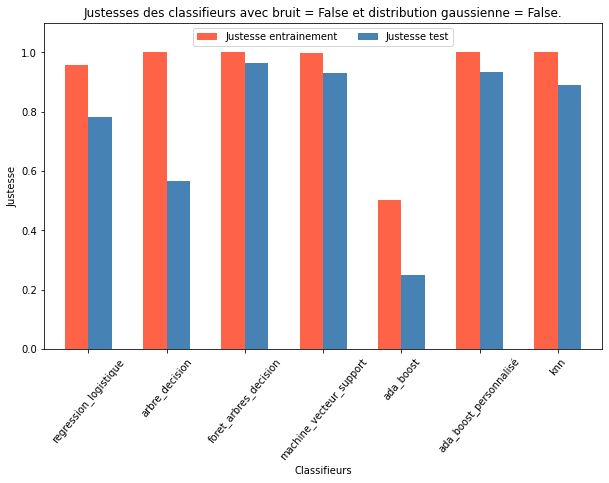

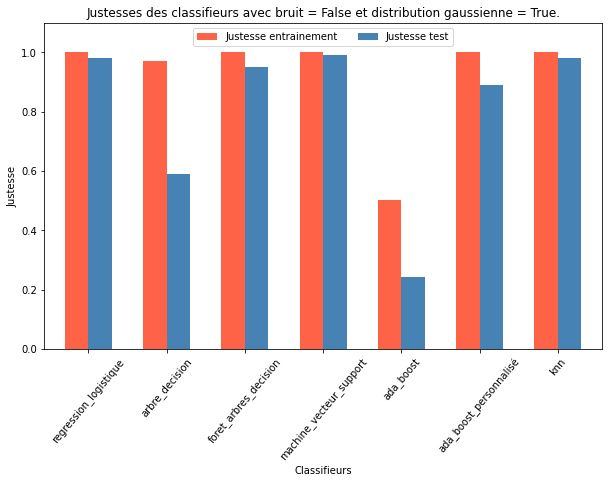

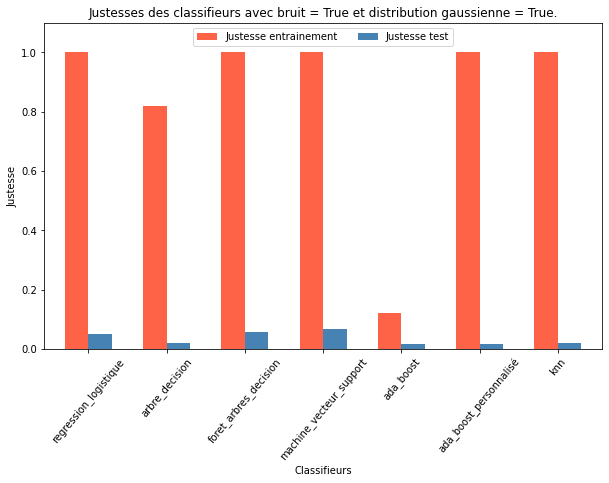

In [19]:
#affichage de la jusstesse d'entrainement et de test pour chaque modèle , avec et sans bruit et données gaussiennes
for i in range(3):
    resultats = tous_resultats['cas %d'%i]['resultats']
    bruit = tous_resultats['cas %d'%i]['bruit']
    gaussienne = tous_resultats['cas %d'%i]['gaussienne']
    afficher_graphe_justesse(resultats, bruit, gaussienne)

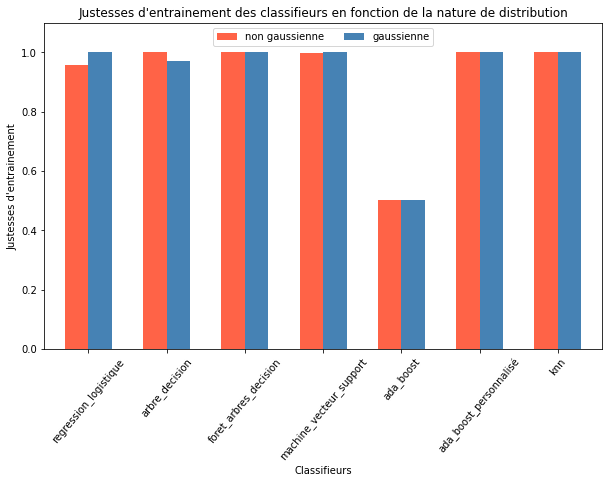

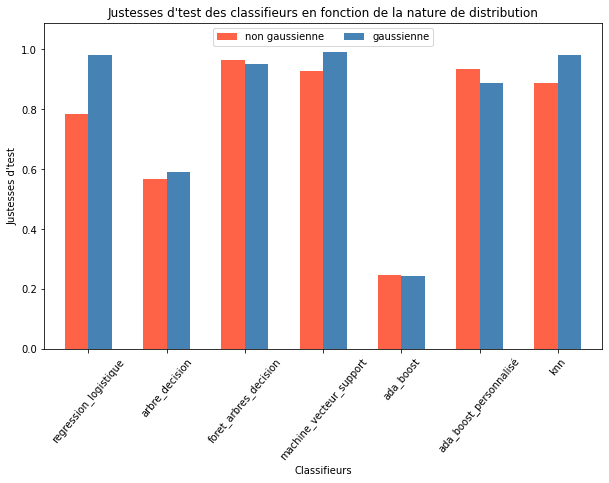

In [20]:
#comparaison entre les resultat obtenues pour les données gaussiennes et non gaussiennes
justesses_non_gaussienne = tous_resultats['cas 0']['resultats']
justesses_gaussienne = tous_resultats['cas 1']['resultats']
visualisation_justesse_cas_gaussienne(justesses_non_gaussienne, justesses_gaussienne)